# Regresión lógística binomial

[Curso de Regresión Logística con Python y scikit-learn](https://platiz.com/reglog)

# ¿Cuándo usar la **Regresión Logística**?

La regresión logística es una herramienta poderosa para **tareas de clasificación**. Combina una **implementación sencilla**, **coeficientes interpretables** y la **estimación de probabilidades**, por lo que es una opción valiosa en el arsenal de modelos de aprendizaje automático.

## ✅ Ventajas

- Facilidad de implementación.
- Coeficientes interpretables.
- Permite identificar influencia de las características.
- Entrega probabilidades, no solo etiquetas.
- Excelente para datasets linealmente separables.

## ⚠️ Limitaciones

- Asume relación lineal entre características y log-odds.
- Riesgo de overfitting en alta dimensionalidad.
- Problemas con multicolinealidad.
- Necesita datasets grandes para buenos resultados.

## 🎯 ¿Cuándo es ideal usarla?

- Cuando se buscan soluciones rápidas y sencillas.
- Para estimar probabilidad de ocurrencia de un evento (clasificación binaria).
- En datasets linealmente separables y con buen tamaño.
- Cuando el dataset está balanceado (proporción de clases similar).

## Carga de datos

In [1]:
import pandas as pd 
import numpy as np

In [3]:
df_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cambiar total_charges a numeric

In [6]:
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')

## Manejo de datos nulos

In [8]:
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
df_data.dropna(inplace=True)

## Eliminar id

In [17]:
df_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [18]:
df_data.drop('customerID',axis=1,inplace=True)

KeyError: "['customerID'] not found in axis"

## Convertir a numérico variable objetivo

In [19]:
df_data['Churn'].replace(to_replace='Yes', value = 1, inplace=True)
df_data['Churn'].replace(to_replace='No', value = 0, inplace=True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_21188\639740546.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data['Churn'].replace(to_replace='Yes', value = 1, inplace=True)
C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_21188\639740546.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [20]:
df_data_processing = df_data.copy()

## Manejo de variables categóricas

In [21]:
df_data_processing = pd.get_dummies(df_data_processing)
df_data_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


## Analisis de correlación

In [22]:
import matplotlib.pyplot as plt

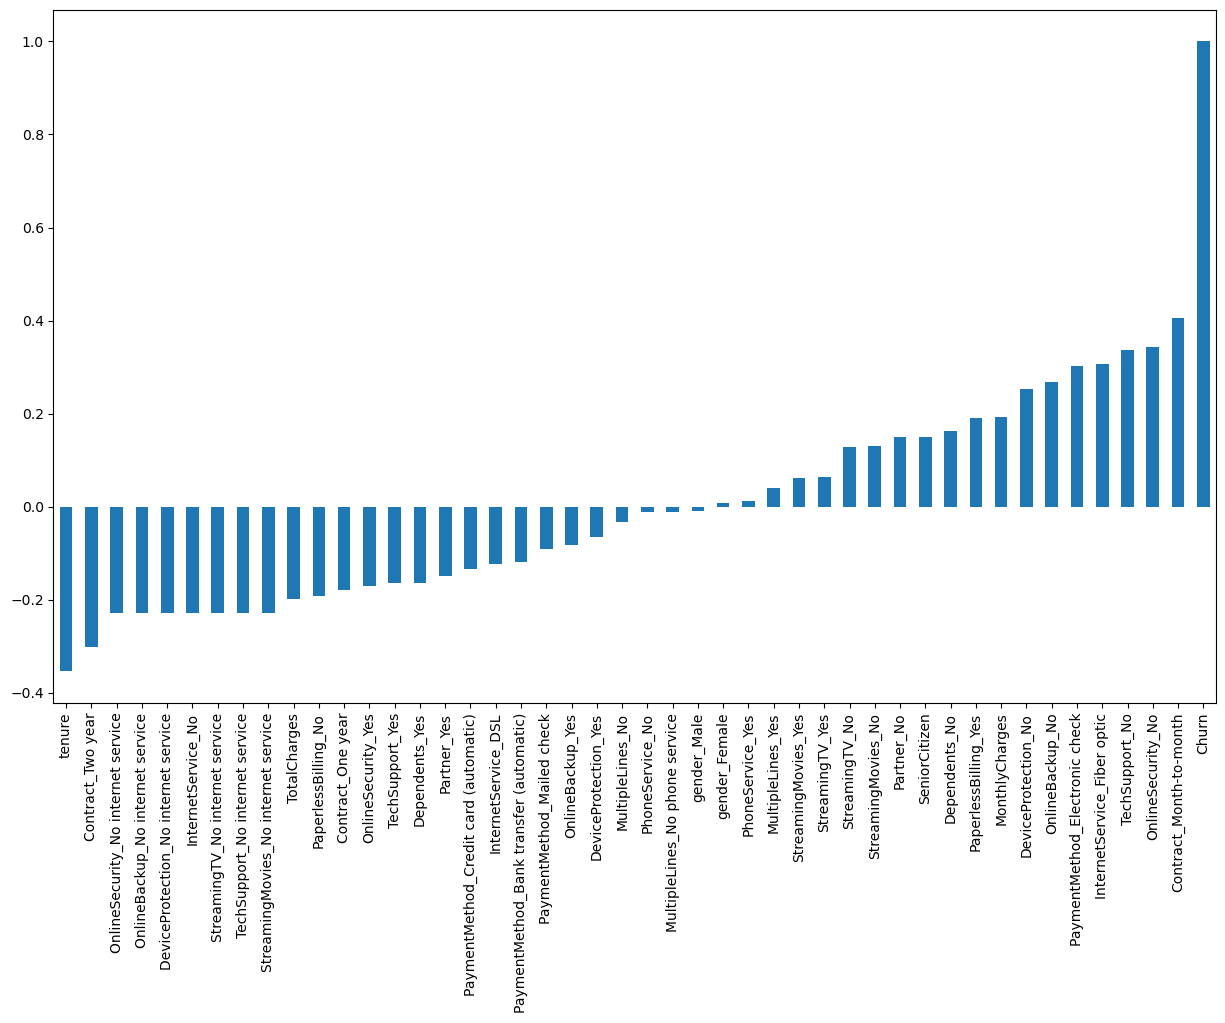

In [23]:
fig = plt.figure(figsize=(15,9))
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Escalabilidad de los datos

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

In [26]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [27]:
df_data_processing_scaled.columns = df_data_processing.columns

In [28]:
df_data_processing_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Análisis exploratorio de datos

In [29]:
import seaborn as sns

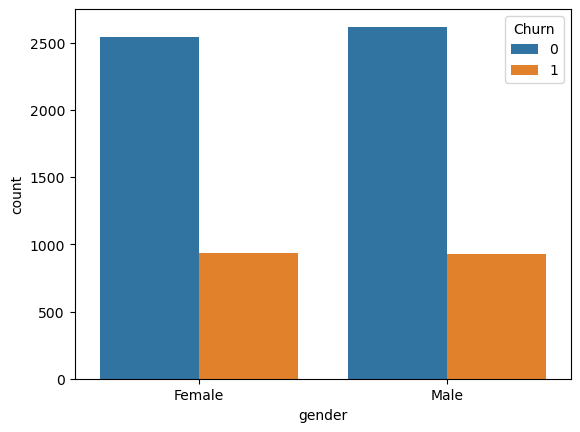

In [30]:
sns.countplot(data=df_data, x='gender',hue='Churn')
plt.show()

In [31]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=df_data, x=column,hue='Churn')
    plt.show()

In [32]:
column_cat = df_data.select_dtypes(include='object').columns

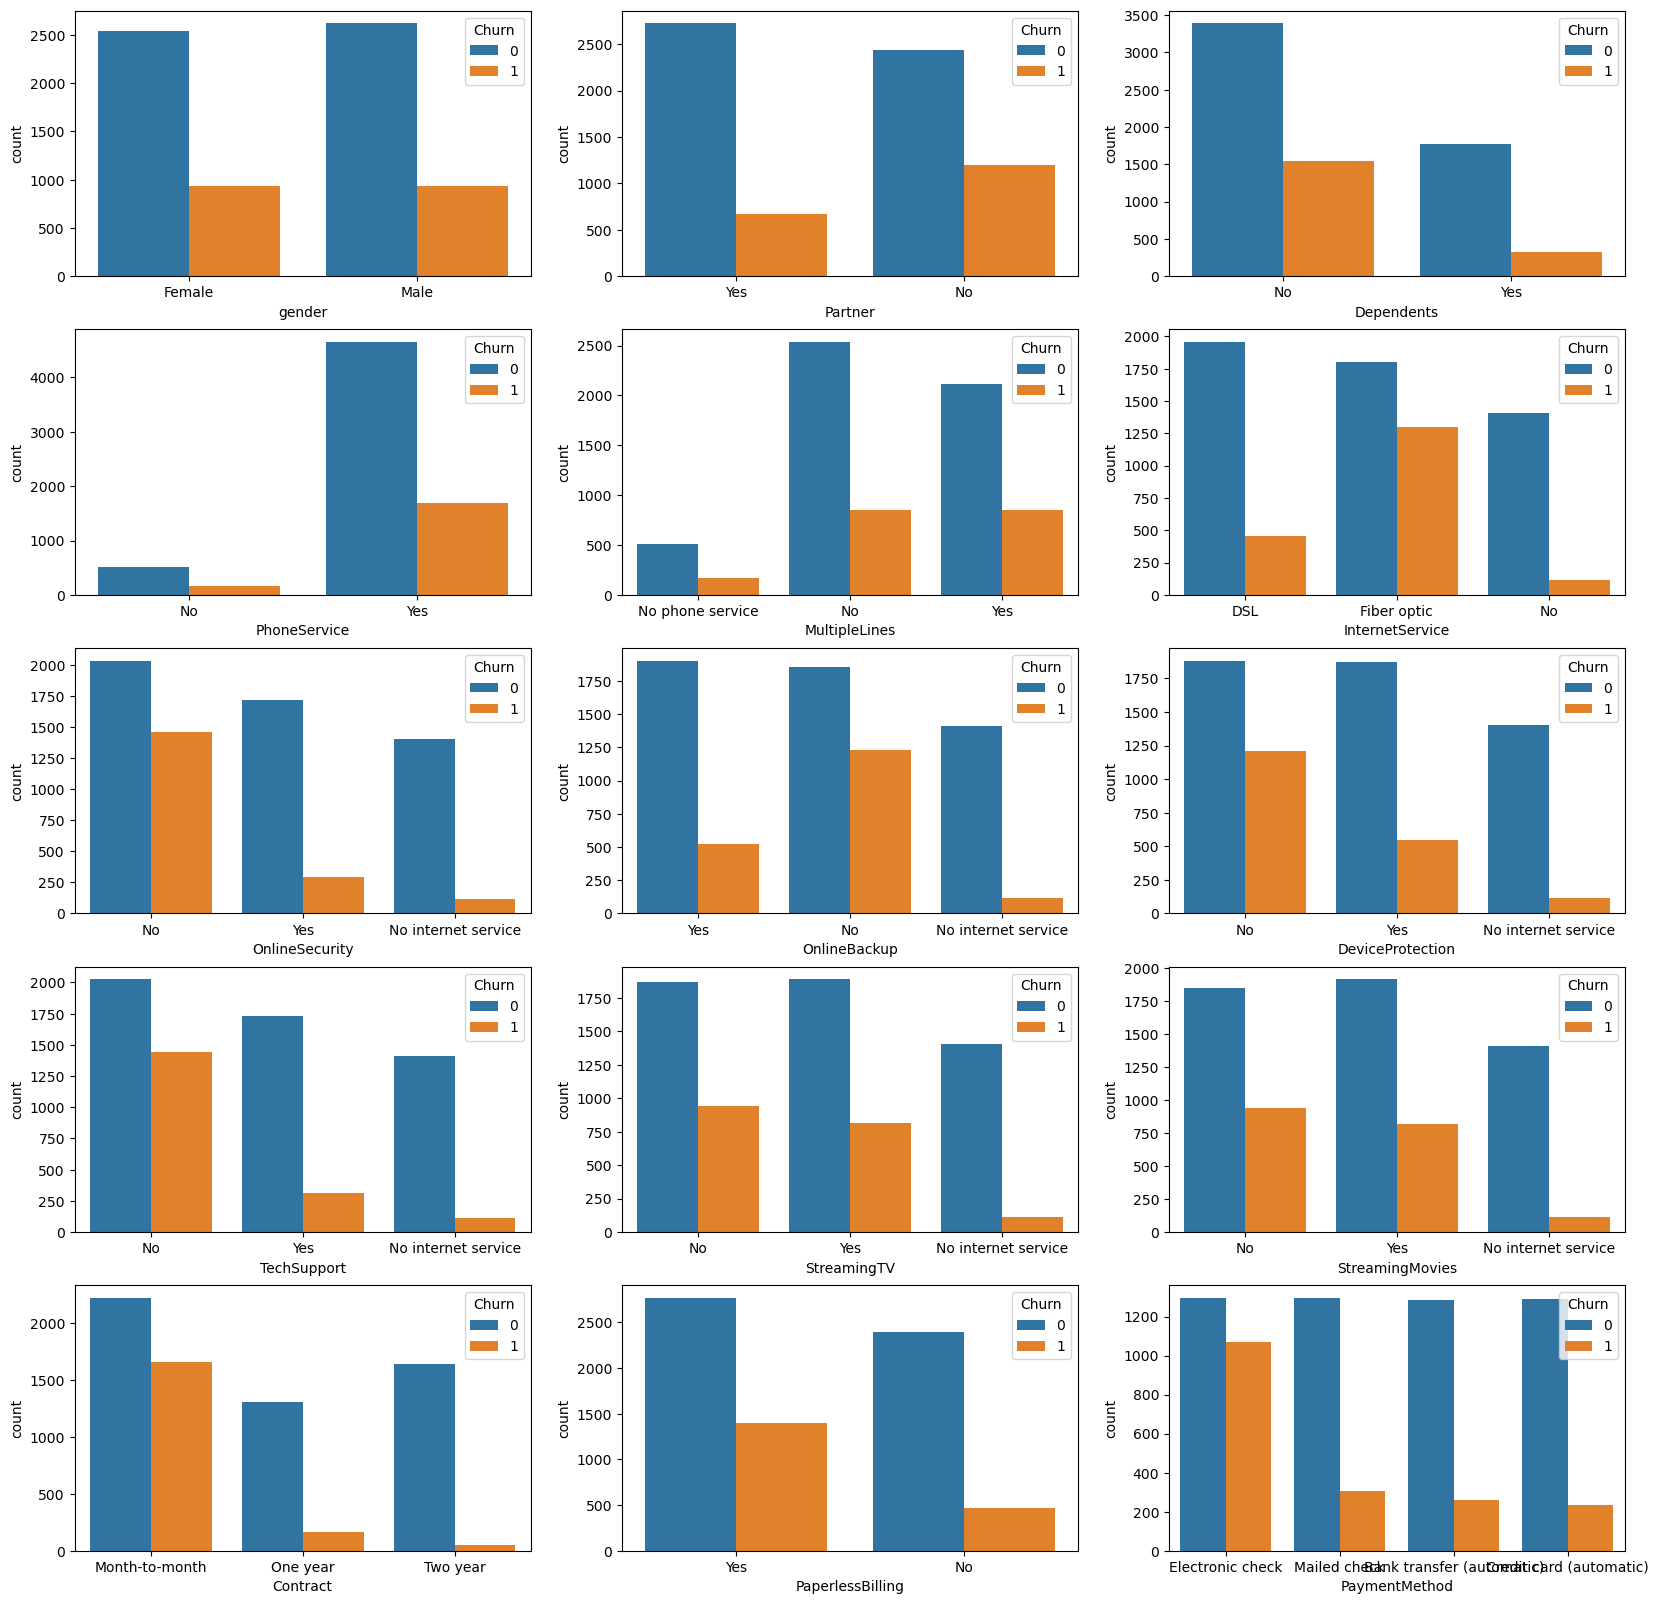

In [41]:
columns_cat = df_data.select_dtypes(include='object').columns

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

for var, ax in zip(columns_cat, axs.flatten()):
    sns.countplot(data=df_data, x=var,hue='Churn', ax=ax)

<Figure size 1000x1000 with 0 Axes>

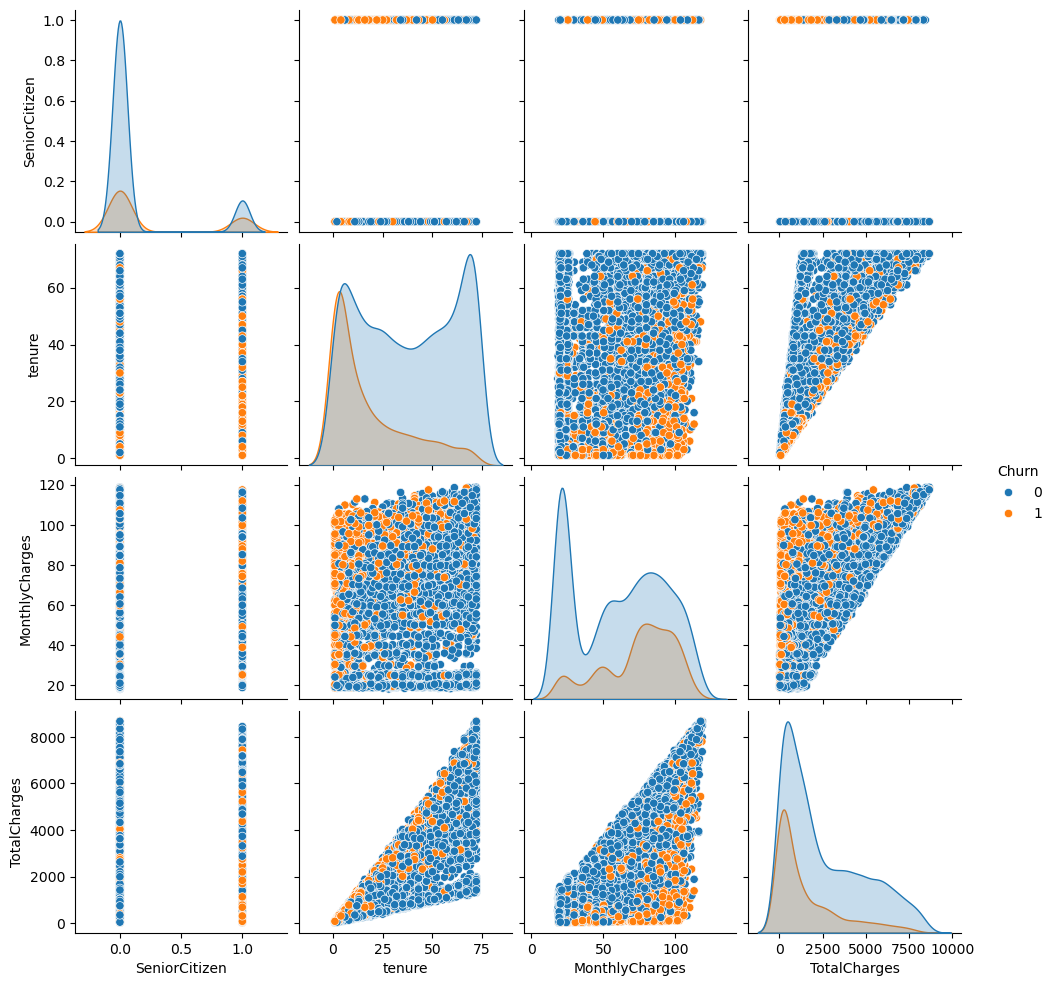

In [34]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data= df_data, hue='Churn')
plt.show()

## Entrenamiento del modelo de regresión logística binomial

In [42]:
X = df_data_processing_scaled.drop('Churn',axis=1)
y = df_data_processing_scaled['Churn'].values

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [45]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.795260663507109


## Evaluación del modelo

In [46]:
model.predict_proba(X_test)

array([[0.99026199, 0.00973801],
       [0.86142958, 0.13857042],
       [0.30082845, 0.69917155],
       ...,
       [0.99033443, 0.00966557],
       [0.70163287, 0.29836713],
       [0.82938519, 0.17061481]])

In [47]:
model.coef_

array([[ 0.21579901, -3.10526247, -0.03615205,  1.19787945, -0.06068636,
        -0.08412597, -0.1339601 , -0.01085223,  0.05598249, -0.20079482,
         0.0412991 , -0.18611143, -0.19572581,  0.0412991 ,  0.00961438,
        -0.44754058,  0.45183569, -0.14910744,  0.19867747, -0.14910744,
        -0.19438235,  0.04183902, -0.14910744, -0.0375439 ,  0.01418609,
        -0.14910744, -0.00989098,  0.17932175, -0.14910744, -0.17502664,
        -0.12417623, -0.14910744,  0.12847134, -0.12628893, -0.14910744,
         0.13058405,  0.70330219, -0.13506516, -0.71304936, -0.17551223,
         0.03069989, -0.03237652, -0.19025467,  0.18520842, -0.10738956]])

In [48]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

Axes(0.125,0.11;0.775x0.77)


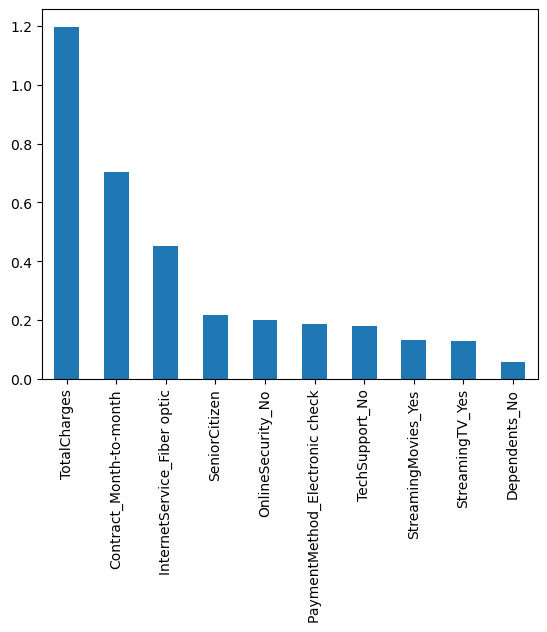

In [49]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


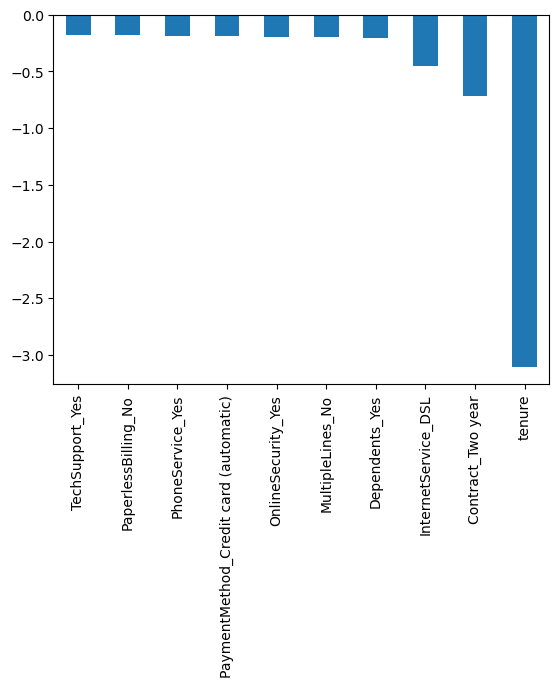

In [50]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 1100x1100 with 0 Axes>

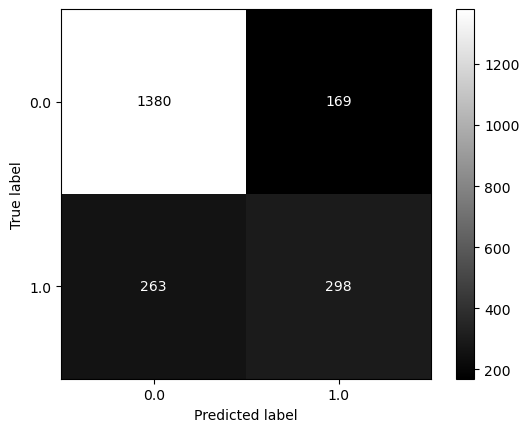

In [52]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

# ¿Qué son los **regularizadores** en la regresión logística?

Los regularizadores son herramientas esenciales en **aprendizaje automático** que ayudan a reducir la **complejidad de los modelos** y mitigar el problema de **sobreajuste (overfitting)**. El sobreajuste ocurre cuando un modelo se ajusta demasiado a los **datos de entrenamiento**, perdiendo su capacidad para generalizar a nuevos datos.

Los regularizadores introducen una **penalización** en la **función de costo** del modelo, ajustando los **pesos de los parámetros**. Los dos métodos más comunes para esto en la regresión logística son **L1** y **L2**. Vamos a ver cómo funcionan y cómo puedes configurarlos en tus modelos.

---

## 🔍 ¿Cómo funcionan los regularizadores L1 y L2?

### Regularizador **L1**
El regularizador L1 agrega el peso de la **suma de los valores absolutos** de todos los parámetros en la regresión logística. La fórmula incluye un término **lambda (λ)** que es **parametrizable**.

**Ventaja:**
- L1 induce que algunos pesos sean **exactamente cero**, lo que reduce la complejidad del modelo al mantener solo los parámetros más significativos.  
- Esto también puede resultar en un modelo más **esparso**.

### Regularizador **L2**
El regularizador L2, por otro lado, utiliza la **suma de los valores cuadrados** de los pesos de los parámetros. Al igual que L1, también incluye el parámetro **lambda (λ)**.

**Ventaja:**
- L2 tiende a distribuir los **errores** de manera más **uniforme** entre los parámetros, lo cual es útil cuando se necesita una representación más equilibrada de los datos.

---

## 📊 **Lambda (λ)** y su importancia

El valor de **lambda (λ)** controla la intensidad de la **penalización**. Elegir un valor adecuado es fundamental:

- **Valores bajos de λ** aportan poca penalización y pueden no reducir el **overfitting** significativamente.
- **Valores altos de λ** pueden llevar al modelo a un **infravaloramiento (underfitting)**, donde el modelo se vuelve demasiado simple.

Ajustar este parámetro es esencial para encontrar el **balance adecuado** entre reducir el sobreajuste y evitar que el modelo sea demasiado simple.

---

## ⚙️ **¿Cómo configurar los regularizadores en tu modelo?**

### Uso por defecto en regresiones logísticas
Por defecto, las regresiones logísticas suelen utilizar el regularizador **L2**, aplicando una **penalización estándar**. Sin embargo, existen otras opciones:

- No usar ninguna penalización.
- Elegir **L1**, dependiendo de las necesidades específicas del modelo.

### Configuración de la constante **C**
La constante **C** es inversa al valor de λ y determina la **fuerza de la penalización**. Su valor por defecto es **1**. Puedes modificar este valor para ajustar la intensidad del regularizador en tu modelo.

> **Nota:** Un valor más pequeño de **C** aumenta la penalización (más regularización), mientras que un valor más grande disminuye la penalización.

---

